ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

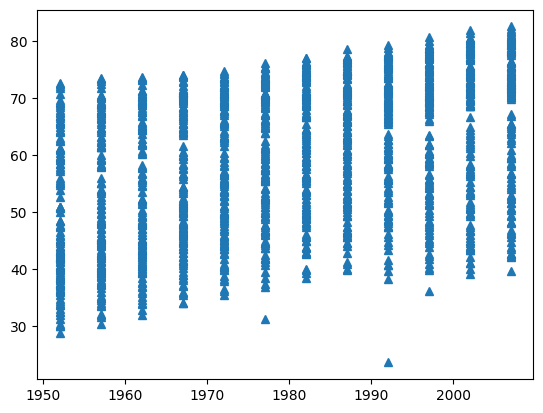

In [17]:
# Project 3
# Joed Quaye
# Ronald Chomnou
# Griffin Araujo

import pandas as pd
import matplotlib.pyplot as plt
import numpy
from plotnine import ggplot, aes, geom_violin, labs
import plotly.express as px


data = pd.read_csv("gap.tsv", sep='\t')

data.head()

# **Exercise 1**: *Make a scatter plot of life expectancy across time.*

%matplotlib inline
plt.plot(data['year'], data['lifeExp'], "^")

# ggplot is depracated so using plotly
data = pd.read_csv("gap.tsv", sep='\t')

# creating the violin plot using Plotly Express
fig = px.violin(data, x='year', y='lifeExp', title="Life expectancy over time",
                labels={"year": "Year", "lifeExp": "Life Expectancy"})
fig.show()


In [ ]:
# **Question 2**: How would you describe the distribution of life expectancy across countries 
# for individual years? Is it skewed, or not? Unimodal or not? Symmetric around it’s center?

# During the the earlier years such as years 1952-1982, it is skewed towards the bottom. This means the life expectancy is 
# lower during these years in most countries.

# Question 3


# Question 4


# Question 5



In [18]:
# Exercise 2

import numpy as np
from sklearn import linear_model
import statsmodels.api as sm


reg = linear_model.LinearRegression()
e2_X = [[x] for x in data['year'].values]
e2_Y = [[y] for y in data['lifeExp'].values]
regfit = reg.fit(e2_X, e2_Y)

X = data['year']  # Independent variable (year)
y = data['lifeExp']  # Dependent variable (life expectancy)

X = sm.add_constant(X)

# fitting the linear regression model
model = sm.OLS(y, X).fit()

# Getting the summary statistics
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                lifeExp   R-squared:                       0.190
Model:                            OLS   Adj. R-squared:                  0.189
Method:                 Least Squares   F-statistic:                     398.6
Date:                Mon, 01 Apr 2024   Prob (F-statistic):           7.55e-80
Time:                        11:16:48   Log-Likelihood:                -6597.9
No. Observations:                1704   AIC:                         1.320e+04
Df Residuals:                    1702   BIC:                         1.321e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -585.6522     32.314    -18.124      0.0

In [ ]:
# Question 6

# On average, life expectancy increases by about .3259 years every year

# Question 7 (MIGHT NEED TO CHECK THIS)

# The null hypothesis of no relationship between year and life expectancy is indeed rejected because of the p value. 
# With each passing year, life expectancy changes. 

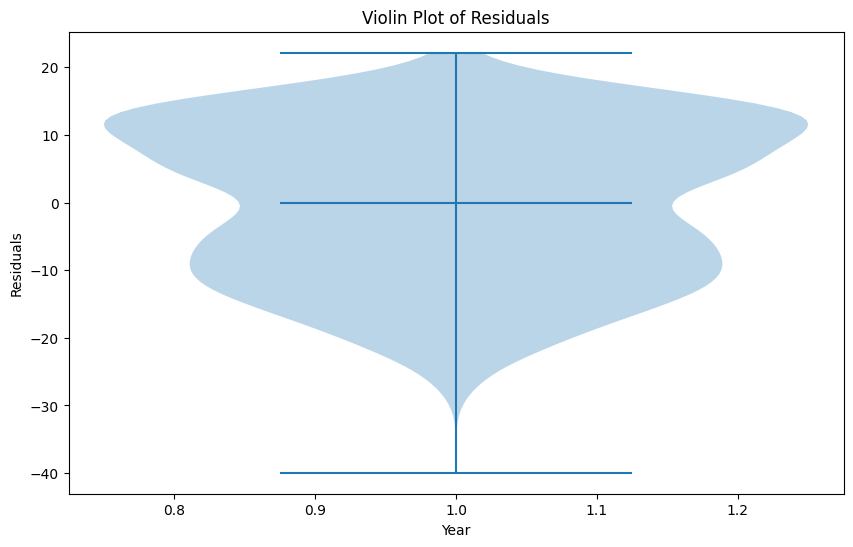

In [19]:
# Exercise 3

pref_life = []
for x in data['year'].values:
    # print(regfit.predict(x)[0][0])
    # reshaping the input to a 2D array
    x_reshaped = np.array(x).reshape(-1, 1)
    
    # Predict life expectancy and append to the list
    pref_life.append(regfit.predict(x_reshaped)[0][0])

data['pred_lifeExp'] = pd.Series(pref_life, index=data.index)
data['residual'] = data['lifeExp'] - data['pred_lifeExp']


plt.figure(figsize=(10, 6))
plt.violinplot(data['residual'], showmeans=True)
plt.title('Violin Plot of Residuals')
plt.xlabel('Year')
plt.ylabel('Residuals')
plt.show()

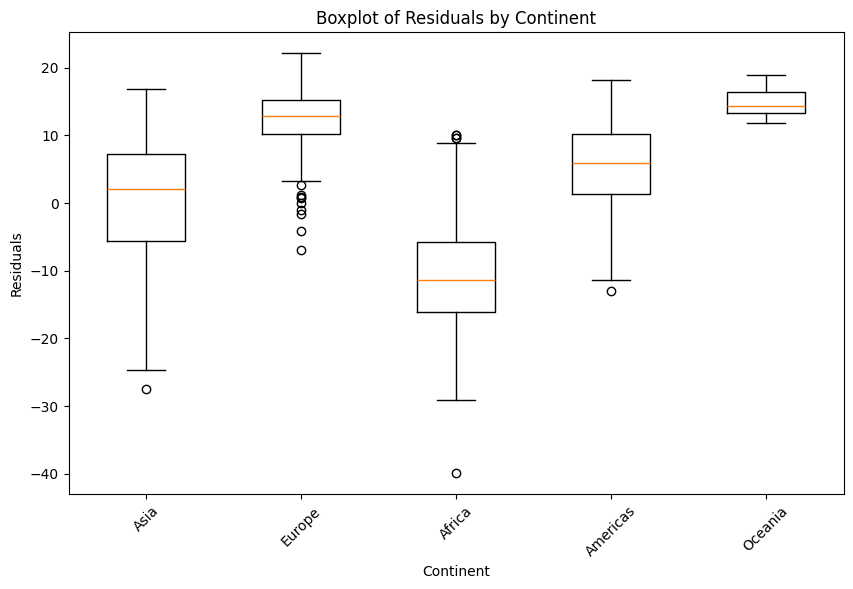

In [20]:
# Exercise 4
plt.figure(figsize=(10, 6))
plt.xticks(rotation=45)
plt.title('Boxplot of Residuals by Continent')
plt.xlabel('Continent')
plt.ylabel('Residuals')
plt.boxplot([data[data['continent'] == c]['residual'] for c in data['continent'].unique()], labels=data['continent'].unique())
plt.show()

In [23]:
#Question 9 Yes there's a dependence between model residual and continent because the distribution of residuals varies  across different continents
#It suggests that there may be other effect that impact the of time (or other independent variables) on life expectancy differs across continents. 
#It Suggest that there may be additional factors specific to each continent that are influencing life expectancy beyond what is captured by 
#the current regression model. So we have to employ more sophisticated modeling techniques to better capture the nuances of the relationship between 
#residual and continent.

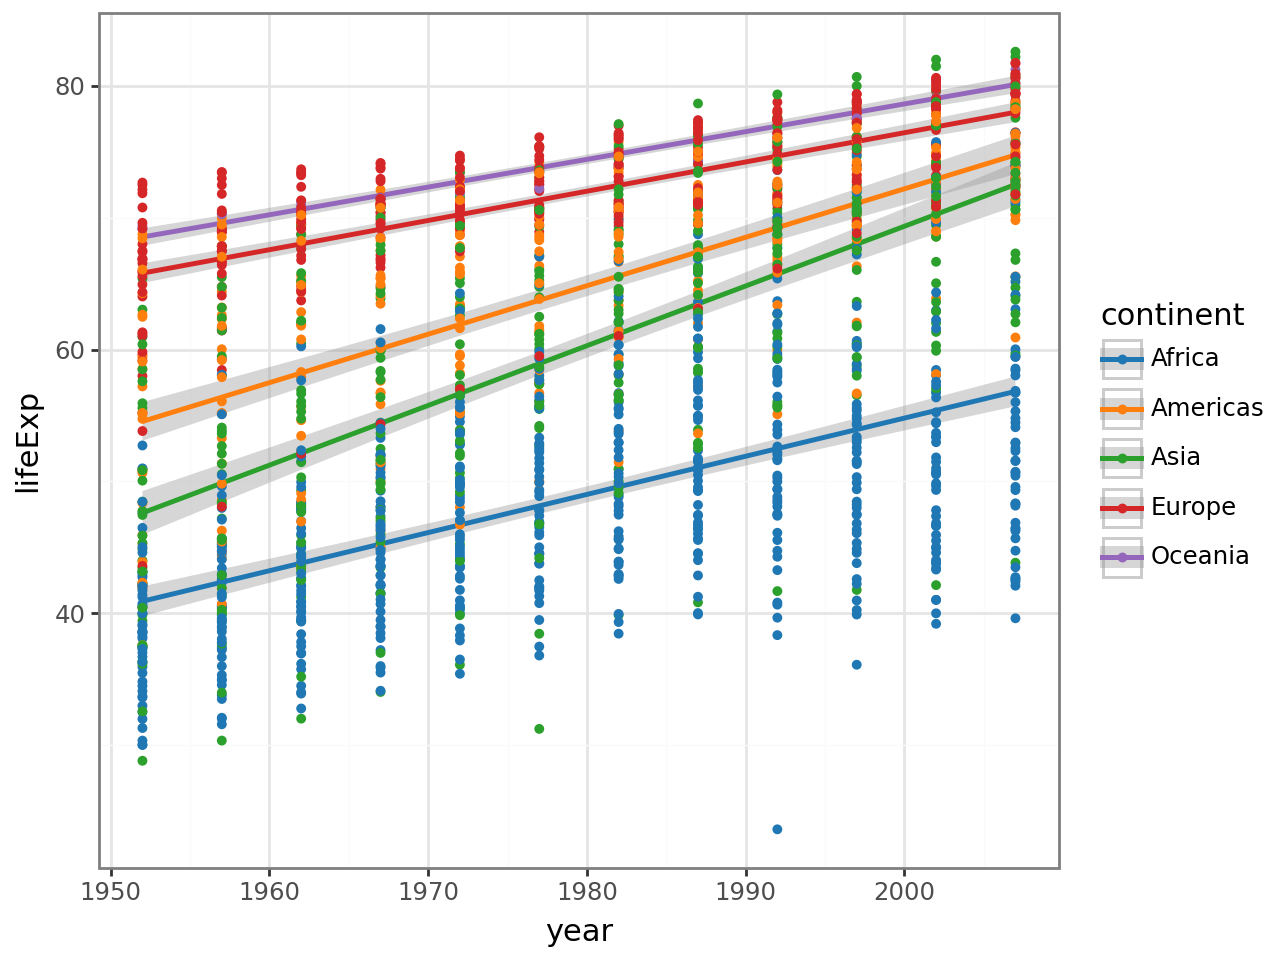

In [47]:
from plotnine import ggplot, aes, geom_point, geom_line, theme_bw, stat_smooth, scale_color_manual

color_palette = ["#1f77b4", "#ff7f0e", "#2ca02c", "#d62728", "#9467bd"]

(ggplot(data=data) +
 aes(x='year', y='lifeExp', color='continent') +
 stat_smooth(method="lm", se=True, span=0.2) +
 geom_point(size=1) + 
 scale_color_manual(values=color_palette) + 
 theme_bw())

In [48]:
# Question 10 Given the uniform increase in life expectancy observed across all continents over time 
# and the absence of notable disparities in trends between them, there's not much of a reason  for including 
# an interaction term for continent and year in the regression model. Opting for a simpler model without this 
# interaction term offers easier interpretation especially if the dataset is not notably large.

In [49]:
import statsmodels.api as sm

# Fit a linear regression model with an interaction term for continent and year
model = sm.OLS.from_formula('lifeExp ~ year + continent + year:continent', data=data).fit()

# Print the summary of the regression model
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                lifeExp   R-squared:                       0.693
Model:                            OLS   Adj. R-squared:                  0.691
Method:                 Least Squares   F-statistic:                     424.3
Date:                Mon, 01 Apr 2024   Prob (F-statistic):               0.00
Time:                        13:30:31   Log-Likelihood:                -5771.9
No. Observations:                1704   AIC:                         1.156e+04
Df Residuals:                    1694   BIC:                         1.162e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept           

In [11]:
pip install scikit-learn

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
